In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

# https://stackoverflow.com/questions/33480297/viewing-npy-images

# The task

## Feature description

* Age - Patient’s age (years)
* Sex - Patient’s sex (0 – male, 1 – female)
* Body Temperature (°C) - Patient temperature at admission (in °C)
* Cough - Cough
* Dyspnea - Patient had intense tightening in the chest, air hunger, difficulty breathing, breathlessness or feeling of suffocation
* WBC - White blood cells count (10^9/L)
* CRP - C-reactive protein concentration (mg/dL)
* Fibrinogen - Fibrinogen concentration in blood (mg/dL)
* LDH - Lactate dehydrogenase concentration in blood (U/L)
* D-dimer - D-dimer amount in blood
* O2 - Oxygen percentage in blood
* PaO2 - Partial pressure of of oxygen in arterial blood (mmHg)
* SaO2 - Arterial oxygen saturation (%)
* pH - Blood pH
* Cardiovascular Disease - Patient had cardiovascular disease
* Respiratory Failure - Patient had respiratory failure
* Image - Index of corresponding image in imgs.npy (starting from 0)
* Death - Whether the patient died (not provided in test column)
* Prognosis - Severity of COVID

# Read the data

In [2]:
img_array = np.load('imgs.npy')

In [3]:
img_array.shape

(1589, 256, 256)

In [4]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [5]:
len(df_train), len(df_test)

(1289, 300)

In [6]:
df_train.head()

,Row_number,Hospital,Age,Sex,PositivityAtAdmission,Temp_C,DaysFever,Cough,DifficultyInBreathing,WBC,...,Dementia,BPCO,Cancer,ChronicKidneyDisease,RespiratoryFailure,Obesity,Position,Image,Death,Prognosis
0,228.0,D,35.913889,0,1.0,39.3,3.0,1.0,0.0,5.76,...,0.0,0.0,0.0,0.0,NaN,1.0,0.0,36,0,MILD
1,229.0,D,57.266667,0,1.0,37.0,3.0,0.0,0.0,11.48,...,0.0,0.0,0.0,0.0,NaN,NaN,0.0,37,0,MILD
2,96.0,A,39.000000,1,1.0,37.2,2.0,1.0,0.0,10.17,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,20,0,MILD
3,112.0,A,44.000000,0,1.0,38.0,3.0,1.0,0.0,6.64,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66,0,SEVERE
4,97.0,A,76.000000,0,1.0,38.6,1.0,1.0,0.0,17.72,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,21,0,MILD


In [7]:
df_train.columns, len(df_train.columns)

(Index(['Row_number', 'Hospital', 'Age', 'Sex', 'PositivityAtAdmission',
        'Temp_C', 'DaysFever', 'Cough', 'DifficultyInBreathing', 'WBC', 'RBC',
        'CRP', 'Fibrinogen', 'Glucose', 'PCT', 'LDH', 'INR', 'D_dimer',
        'Ox_percentage', 'PaO2', 'SaO2', 'PaCO2', 'pH', 'CardiovascularDisease',
        'IschemicHeartDisease', 'AtrialFibrillation', 'HeartFailure', 'Ictus',
        'HighBloodPressure', 'Diabetes', 'Dementia', 'BPCO', 'Cancer',
        'ChronicKidneyDisease', 'RespiratoryFailure', 'Obesity', 'Position',
        'Image', 'Death', 'Prognosis'],
       dtype='object'),
 40)

In [8]:
df_test.head()

,Row_number,Hospital,Age,Sex,PositivityAtAdmission,Temp_C,DaysFever,Cough,DifficultyInBreathing,WBC,...,HighBloodPressure,Diabetes,Dementia,BPCO,Cancer,ChronicKidneyDisease,RespiratoryFailure,Obesity,Position,Image
0,82.0,A,72.000000,1,1.0,37.3,3.0,1.0,0.0,5.370000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4
1,236.0,D,60.791667,1,1.0,37.0,2.0,1.0,0.0,6.370000,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,46
2,251.0,D,51.983333,0,1.0,38.5,4.0,1.0,0.0,12.130000,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,63
3,238.0,D,62.891667,0,1.0,NaN,NaN,0.0,1.0,0.509028,...,1.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,1.0,48
4,266.0,E,44.000000,0,0.0,37.7,4.0,0.0,0.0,9.180000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,502


In [9]:
set(df_train["Image"].values) & set(df_test["Image"].values) # empty set

set()

In [10]:
df_test["Image"]

0         4
1        46
2        63
3        48
4       502
       ... 
295     844
296     943
297    1082
298     856
299     994
Name: Image, Length: 300, dtype: int64

In [11]:
pd.crosstab(df_train["Death"],df_train["Prognosis"])

Prognosis,MILD,SEVERE
Death,,
0,683,400
1,7,199


In [24]:
df_train.columns

Index(['Row_number', 'Hospital', 'Age', 'Sex', 'PositivityAtAdmission',
       'Temp_C', 'DaysFever', 'Cough', 'DifficultyInBreathing', 'WBC', 'RBC',
       'CRP', 'Fibrinogen', 'Glucose', 'PCT', 'LDH', 'INR', 'D_dimer',
       'Ox_percentage', 'PaO2', 'SaO2', 'PaCO2', 'pH', 'CardiovascularDisease',
       'IschemicHeartDisease', 'AtrialFibrillation', 'HeartFailure', 'Ictus',
       'HighBloodPressure', 'Diabetes', 'Dementia', 'BPCO', 'Cancer',
       'ChronicKidneyDisease', 'RespiratoryFailure', 'Obesity', 'Position',
       'Image', 'Death', 'Prognosis'],
      dtype='object')

In [27]:
pd.crosstab(df_train["DifficultyInBreathing"],df_train["Ox_percentage"])

Ox_percentage,50.0,56.0,60.0,61.0,65.0,67.0,70.0,70.2,73.0,74.0,...,97.5,97.6,97.7,98.0,98.1,98.4,98.8,99.0,99.5,100.0
DifficultyInBreathing,,,,,,,,,,,,,,,,,,,,,
0.0,0,0,0,0,0,1,0,0,0,0,...,1,0,0,34,1,1,1,25,1,12
1.0,1,1,1,1,1,0,4,1,2,2,...,0,1,1,25,0,0,0,11,0,11


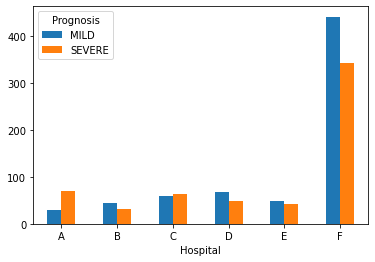

In [34]:
crosstb = pd.crosstab(df_train["Hospital"],df_train["Prognosis"])
barplot = crosstb.plot.bar(rot=0)

In [38]:
pd.crosstab(df_train["DifficultyInBreathing"],df_train["RespiratoryFailure"])

RespiratoryFailure,0.0,1.0
DifficultyInBreathing,,
0.0,515,4
1.0,517,16


In [35]:
crosstb

Prognosis,MILD,SEVERE
Hospital,,
A,29,70
B,45,31
C,59,64
D,68,49
E,48,42
F,441,343


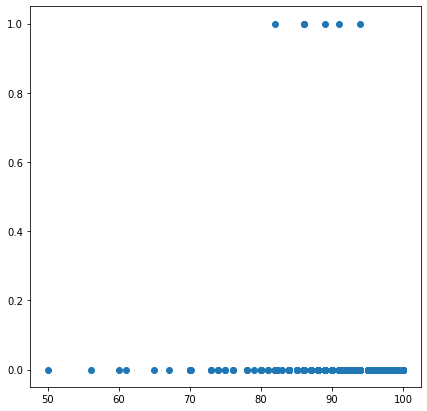

In [39]:
#pd.crosstab(df_train["Ox_percentage"],df_train["PaO2"])
plt.figure(figsize=(7,7))
plt.scatter(df_train["Ox_percentage"],df_train["RespiratoryFailure"]);
plt.show()

In [12]:
df_train["Prognosis"].value_counts()

MILD      690
SEVERE    599
Name: Prognosis, dtype: int64

In [13]:
df_train.columns

Index(['Row_number', 'Hospital', 'Age', 'Sex', 'PositivityAtAdmission',
       'Temp_C', 'DaysFever', 'Cough', 'DifficultyInBreathing', 'WBC', 'RBC',
       'CRP', 'Fibrinogen', 'Glucose', 'PCT', 'LDH', 'INR', 'D_dimer',
       'Ox_percentage', 'PaO2', 'SaO2', 'PaCO2', 'pH', 'CardiovascularDisease',
       'IschemicHeartDisease', 'AtrialFibrillation', 'HeartFailure', 'Ictus',
       'HighBloodPressure', 'Diabetes', 'Dementia', 'BPCO', 'Cancer',
       'ChronicKidneyDisease', 'RespiratoryFailure', 'Obesity', 'Position',
       'Image', 'Death', 'Prognosis'],
      dtype='object')

In [14]:
df_test.columns

Index(['Row_number', 'Hospital', 'Age', 'Sex', 'PositivityAtAdmission',
       'Temp_C', 'DaysFever', 'Cough', 'DifficultyInBreathing', 'WBC', 'RBC',
       'CRP', 'Fibrinogen', 'Glucose', 'PCT', 'LDH', 'INR', 'D_dimer',
       'Ox_percentage', 'PaO2', 'SaO2', 'PaCO2', 'pH', 'CardiovascularDisease',
       'IschemicHeartDisease', 'AtrialFibrillation', 'HeartFailure', 'Ictus',
       'HighBloodPressure', 'Diabetes', 'Dementia', 'BPCO', 'Cancer',
       'ChronicKidneyDisease', 'RespiratoryFailure', 'Obesity', 'Position',
       'Image'],
      dtype='object')

In [15]:
len(df_train.columns), len(df_test.columns)

(40, 38)

In [100]:
df_train.iloc[10]["Prognosis"]

'MILD'

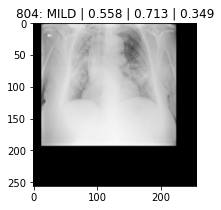

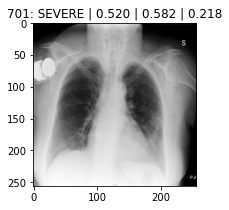

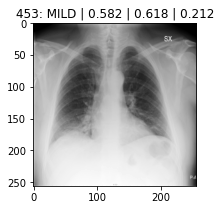

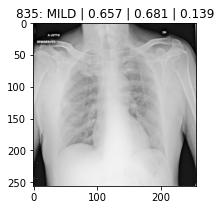

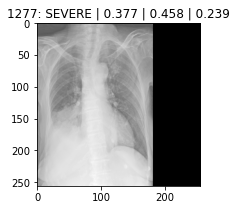

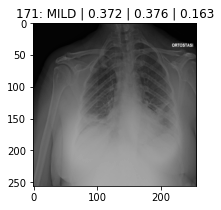

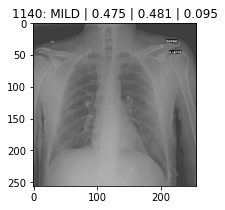

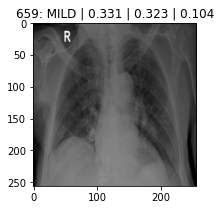

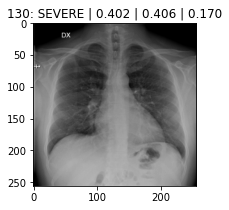

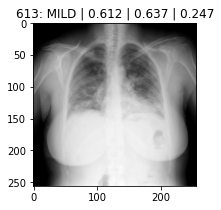

In [120]:
for i in range(10):
    plt.figure(figsize=(3,3))
    ind = np.random.randint(len(df_train))
    
    illness = df_train.iloc[ind]["Prognosis"]
    
    img = img_array[df_train.iloc[ind]["Image"]]
    plt.imshow(img, cmap='gray')
    #plt.imshow(img[16:240,16:240], cmap='gray')
    plt.title(f"{ind}: {illness} | {np.mean(img[16:240,16:240]):.3f} | {np.median(img[16:240,16:240]):.3f} | {np.std(img[16:240,16:240]):.3f}")
    plt.show()

In [113]:
img.shape
w = np.arange(64,192)

w.shape

(128,)

In [114]:
img[64:192,64:192].shape

(128, 128)

# Missing values

In [18]:
# Dropping columns with missing values over 15% ratio
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Fibrinogen,1054,0.817688
Ox_percentage,677,0.525213
D_dimer,676,0.524438
SaO2,622,0.482545
IschemicHeartDisease,610,0.473235
PCT,564,0.437548
Ictus,498,0.386346
HeartFailure,498,0.386346
AtrialFibrillation,498,0.386346
CardiovascularDisease,495,0.384019


In [77]:
# Dropping columns with missing values over 15% ratio
total_test = df_test.isnull().sum().sort_values(ascending=False)
percent = (df_test.isnull().sum()/df_test.isnull().count()).sort_values(ascending=False)
missing_data_test = pd.concat([total_test, percent], axis=1, keys=['Total', 'Percent'])
missing_data_test

,Total,Percent
Fibrinogen,256,0.853333
Ox_percentage,173,0.576667
D_dimer,151,0.503333
IschemicHeartDisease,150,0.500000
Ictus,131,0.436667
HeartFailure,131,0.436667
AtrialFibrillation,130,0.433333
CardiovascularDisease,130,0.433333
Position,125,0.416667
SaO2,115,0.383333


In [40]:
df_train["RespiratoryFailure"].mean()

0.01893939393939394

In [75]:
pd.crosstab(df_train["RespiratoryFailure"],df_train["Prognosis"])

Prognosis,MILD,SEVERE
RespiratoryFailure,,
0.0,554,482
1.0,5,15


In [19]:
# Dropping
df_train_dropped = df_train.drop((missing_data[missing_data['Percent']>0.15]).index,axis=1)
df_test_dropped = df_test.drop((missing_data[missing_data['Percent']>0.15]).index,axis=1)

In [78]:
df_train_dropped.columns, df_test_dropped.columns

(Index(['Row_number', 'Hospital', 'Age', 'Sex', 'PositivityAtAdmission',
        'Temp_C', 'Cough', 'DifficultyInBreathing', 'WBC', 'RBC', 'CRP',
        'Glucose', 'HighBloodPressure', 'Diabetes', 'Dementia', 'BPCO',
        'Cancer', 'ChronicKidneyDisease', 'Image', 'Death', 'Prognosis'],
       dtype='object'),
 Index(['Row_number', 'Hospital', 'Age', 'Sex', 'PositivityAtAdmission',
        'Temp_C', 'Cough', 'DifficultyInBreathing', 'WBC', 'RBC', 'CRP',
        'Glucose', 'HighBloodPressure', 'Diabetes', 'Dementia', 'BPCO',
        'Cancer', 'ChronicKidneyDisease', 'Image'],
       dtype='object'))

In [86]:
len(missing_data_test[missing_data_test["Percent"]<=0.15])

19

In [92]:
A1 = set(missing_data_test[missing_data_test["Percent"]<=0.15].index)

In [87]:
len(missing_data[missing_data["Percent"]<=0.15])

21

In [93]:
A2 = set(missing_data[missing_data["Percent"]<=0.15].index)

In [97]:
len(A1.intersection(A2))

19

In [20]:
df_train_dropped

,Row_number,Hospital,Age,Sex,PositivityAtAdmission,Temp_C,Cough,DifficultyInBreathing,WBC,RBC,...,Glucose,HighBloodPressure,Diabetes,Dementia,BPCO,Cancer,ChronicKidneyDisease,Image,Death,Prognosis
0,228.0,D,35.913889,0,1.0,39.3,1.0,0.0,5.76,5.24,...,NaN,1.0,0.0,0.0,0.0,0.0,0.0,36,0,MILD
1,229.0,D,57.266667,0,1.0,37.0,0.0,0.0,11.48,5.71,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,37,0,MILD
2,96.0,A,39.000000,1,1.0,37.2,1.0,0.0,10.17,3.45,...,80.0,0.0,0.0,0.0,0.0,0.0,0.0,20,0,MILD
3,112.0,A,44.000000,0,1.0,38.0,1.0,0.0,6.64,5.55,...,126.0,0.0,0.0,0.0,0.0,0.0,0.0,66,0,SEVERE
4,97.0,A,76.000000,0,1.0,38.6,1.0,0.0,17.72,7.16,...,171.0,0.0,0.0,0.0,1.0,1.0,1.0,21,0,MILD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1284,1474.0,F,84.000000,1,1.0,37.0,0.0,0.0,7.20,4.28,...,112.0,1.0,0.0,1.0,0.0,0.0,0.0,960,0,MILD
1285,1228.0,F,51.000000,0,1.0,38.0,0.0,1.0,6.40,4.40,...,97.0,0.0,1.0,0.0,0.0,0.0,0.0,608,0,SEVERE
1286,1466.0,F,70.000000,1,1.0,36.4,1.0,0.0,6.00,4.22,...,104.0,1.0,0.0,0.0,0.0,0.0,0.0,744,0,MILD
1287,1210.0,F,90.000000,0,1.0,36.2,0.0,0.0,7.10,5.44,...,320.0,0.0,1.0,0.0,0.0,0.0,0.0,940,0,MILD


In [21]:
df_train_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1289 entries, 0 to 1288
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Row_number             1289 non-null   float64
 1   Hospital               1289 non-null   object 
 2   Age                    1288 non-null   float64
 3   Sex                    1289 non-null   int64  
 4   PositivityAtAdmission  1261 non-null   float64
 5   Temp_C                 1140 non-null   float64
 6   Cough                  1282 non-null   float64
 7   DifficultyInBreathing  1283 non-null   float64
 8   WBC                    1269 non-null   float64
 9   RBC                    1250 non-null   float64
 10  CRP                    1245 non-null   float64
 11  Glucose                1115 non-null   float64
 12  HighBloodPressure      1173 non-null   float64
 13  Diabetes               1173 non-null   float64
 14  Dementia               1172 non-null   float64
 15  BPCO

In [22]:
df_train_dropped.isna().sum()

Row_number                 0
Hospital                   0
Age                        1
Sex                        0
PositivityAtAdmission     28
Temp_C                   149
Cough                      7
DifficultyInBreathing      6
WBC                       20
RBC                       39
CRP                       44
Glucose                  174
HighBloodPressure        116
Diabetes                 116
Dementia                 117
BPCO                     116
Cancer                   116
ChronicKidneyDisease     116
Image                      0
Death                      0
Prognosis                  0
dtype: int64

In [42]:
df_train.describe()

,Row_number,Age,Sex,PositivityAtAdmission,Temp_C,DaysFever,Cough,DifficultyInBreathing,WBC,RBC,...,Diabetes,Dementia,BPCO,Cancer,ChronicKidneyDisease,RespiratoryFailure,Obesity,Position,Image,Death
count,1289.000000,1288.000000,1289.000000,1261.000000,1140.000000,961.000000,1282.000000,1283.000000,1269.000000,1250.000000,...,1173.000000,1172.000000,1173.000000,1173.000000,1173.000000,1056.000000,821.000000,808.00000,1289.000000,1289.000000
mean,805.904166,65.577995,0.376261,0.973830,37.320439,2.625390,0.443838,0.512860,6.985690,4.576949,...,0.161125,0.044369,0.067349,0.067349,0.061381,0.018939,0.084044,0.79703,783.831652,0.159814
std,469.368615,15.417067,0.484635,0.159703,0.980716,1.059255,0.497030,0.500029,3.680785,0.700560,...,0.367803,0.206001,0.250732,0.250732,0.240130,0.136376,0.277623,0.40246,462.109750,0.366576
min,1.000000,17.000000,0.000000,0.000000,35.000000,0.000000,0.000000,0.000000,0.470000,0.256250,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,387.000000,55.000000,0.000000,1.000000,36.500000,2.000000,0.000000,0.000000,4.630000,4.210000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,379.000000,0.000000
50%,799.000000,67.000000,0.000000,1.000000,37.300000,3.000000,0.000000,1.000000,6.260000,4.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,776.000000,0.000000
75%,1199.000000,78.000000,1.000000,1.000000,38.000000,4.000000,1.000000,1.000000,8.390000,5.010000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,1181.000000,0.000000
max,1616.000000,100.000000,1.000000,1.000000,40.000000,4.000000,1.000000,1.000000,52.310000,8.340000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1588.000000,1.000000


In [57]:
pd.crosstab(df_train["Dementia"],df_train["Prognosis"]), 30/(52)

(Prognosis  MILD  SEVERE
 Dementia               
 0.0         605     515
 1.0          22      30,
 0.5769230769230769)

In [74]:
pd.crosstab(df_train["PositivityAtAdmission"],df_train["Prognosis"])

Prognosis,MILD,SEVERE
PositivityAtAdmission,,
0.0,21,12
1.0,653,575


In [71]:
pd.crosstab(df_train["Cancer"],df_train["Prognosis"]), 34/(34+45)

(Prognosis  MILD  SEVERE
 Cancer                 
 0.0         594     500
 1.0          34      45,
 0.43037974683544306)

In [62]:
pd.crosstab(df_train["Obesity"],df_train["Prognosis"]), 412/(412+340), 41/(41+28)

(Prognosis  MILD  SEVERE
 Obesity                
 0.0         412     340
 1.0          28      41,
 0.5478723404255319,
 0.5942028985507246)

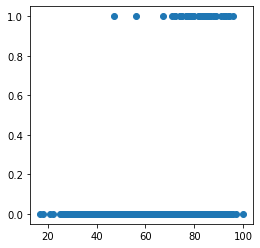

In [56]:
plt.figure(figsize=(4,4))
plt.scatter(df_train["Age"],df_train["Dementia"])
#plt.scatter(df_train["Age"],df_train["Prognosis"])

In [69]:
pd.crosstab(df_train["Position"],df_train["Prognosis"]), 361/(361+283), 111/(111+53)

(Prognosis  MILD  SEVERE
 Position               
 0.0         111      53
 1.0         283     361,
 0.5605590062111802,
 0.676829268292683)

In [47]:
pd.crosstab(df_train["Cough"],df_train["Prognosis"]), 320/(320+249)

(Prognosis  MILD  SEVERE
 Cough                  
 0.0         367     346
 1.0         320     249,
 0.562390158172232)

In [49]:
pd.crosstab(df_train["DifficultyInBreathing"],df_train["Prognosis"]), 391/(391+267)

(Prognosis              MILD  SEVERE
 DifficultyInBreathing              
 0.0                     420     205
 1.0                     267     391,
 0.5942249240121581)

In [44]:
df_train["PositivityAtAdmission"], df_train["PositivityAtAdmission"].mean()

(0       1.0
 1       1.0
 2       1.0
 3       1.0
 4       1.0
        ... 
 1284    1.0
 1285    1.0
 1286    1.0
 1287    1.0
 1288    1.0
 Name: PositivityAtAdmission, Length: 1289, dtype: float64,
 0.9738302934179223)

In [20]:
df_test_dropped

,Row_number,Hospital,Age,Sex,PositivityAtAdmission,Temp_C,Cough,DifficultyInBreathing,WBC,RBC,CRP,Glucose,HighBloodPressure,Diabetes,Dementia,BPCO,Cancer,ChronicKidneyDisease,Image
0,82.0,A,72.000000,1,1.0,37.3,1.0,0.0,5.370000,4.58,3.96,98.0,0.0,0.0,0.0,0.0,1.0,0.0,4
1,236.0,D,60.791667,1,1.0,37.0,1.0,0.0,6.370000,4.85,20.70,NaN,0.0,0.0,0.0,0.0,0.0,0.0,46
2,251.0,D,51.983333,0,1.0,38.5,1.0,0.0,12.130000,4.98,86.70,NaN,0.0,0.0,0.0,0.0,0.0,0.0,63
3,238.0,D,62.891667,0,1.0,NaN,0.0,1.0,0.509028,5.11,88.10,NaN,1.0,0.0,0.0,0.0,0.0,1.0,48
4,266.0,E,44.000000,0,0.0,37.7,0.0,0.0,9.180000,5.12,42.70,242.0,0.0,0.0,0.0,0.0,0.0,0.0,502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1431.0,F,50.000000,1,1.0,37.0,1.0,0.0,4.140000,4.10,1.89,134.0,0.0,0.0,0.0,0.0,0.0,0.0,844
296,1172.0,F,81.000000,1,1.0,36.1,0.0,1.0,4.420000,4.15,6.75,115.0,0.0,0.0,0.0,0.0,0.0,0.0,943
297,1439.0,F,68.000000,1,1.0,38.7,0.0,1.0,5.000000,4.62,8.51,112.0,0.0,0.0,0.0,0.0,1.0,0.0,1082
298,1448.0,F,60.000000,1,1.0,36.2,1.0,1.0,5.240000,3.84,1.33,128.0,1.0,1.0,0.0,0.0,0.0,0.0,856


In [99]:
df_train_dropped.isna().sum(), df_test_dropped.isna().sum()

(Row_number                 0
 Hospital                   0
 Age                        1
 Sex                        0
 PositivityAtAdmission     28
 Temp_C                   149
 Cough                      7
 DifficultyInBreathing      6
 WBC                       20
 RBC                       39
 CRP                       44
 Glucose                  174
 HighBloodPressure        116
 Diabetes                 116
 Dementia                 117
 BPCO                     116
 Cancer                   116
 ChronicKidneyDisease     116
 Image                      0
 Death                      0
 Prognosis                  0
 dtype: int64,
 Row_number                0
 Hospital                  0
 Age                       0
 Sex                       0
 PositivityAtAdmission    11
 Temp_C                   25
 Cough                     0
 DifficultyInBreathing     0
 WBC                       6
 RBC                      13
 CRP                      16
 Glucose                  33
 HighBl

/home/szekeres/anaconda3/envs/pytorch-gpu/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


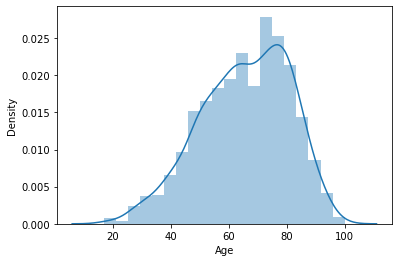

In [29]:
sns.distplot(df_train_dropped["Age"]);

/home/szekeres/anaconda3/envs/pytorch-gpu/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


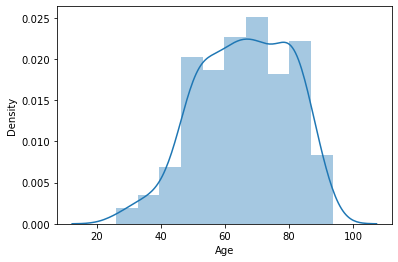

In [30]:
sns.distplot(df_test_dropped["Age"]);